In [21]:
import pandas as pd
from matplotlib import pyplot
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [22]:
ds = pd.read_csv("lungcancer.csv")
ds.head(20)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


In [23]:
dsvalues = ds.values

x = dsvalues[:, 2:-1]
y = dsvalues[:, -1]

In [24]:
x_train = []
x_test = []
y_train = [] 
y_test = []

for i in range(5):
    x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, train_size=(1.0 - ((i+1)/10)), random_state=1)
    x_train.append(x_tr)
    x_test.append(x_ts)
    y_train.append(y_tr)
    y_test.append(y_ts)

In [25]:
bnb = GaussianNB()

print("Accuration rate:")
for i in range(5):
    bnb.fit(x_train[i], y_train[i])
    y_predict = bnb.predict(x_test[i])
    error = ((y_test[i] != y_predict).sum()/len(y_predict)*100)
    akurasi = str(100 - error) + "%"
    print(f"{(i+1)}. Train size {(1.0 - ((i+1)/10))} =", akurasi)

Accuration rate:
1. Train size 0.9 = 92.0%
2. Train size 0.8 = 93.5%
3. Train size 0.7 = 92.33333333333333%
4. Train size 0.6 = 91.75%
5. Train size 0.5 = 89.2%


# **Data Selection**
---

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)

In [27]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [28]:
ft = ds.columns[2:-1]
for i in range(len(fs.scores_)):
    print(str(i+1) + ". " + str(fs.scores_[i]) + " : " + ft[i])

1. 45.41211136094893 : Age
2. 2.7248039193501645 : Gender
3. 346.0234775699848 : Air Pollution
4. 535.093408827398 : Alcohol use
5. 267.0729095360615 : Dust Allergy
6. 273.1722409526991 : OccuPational Hazards
7. 336.7710305447703 : Genetic Risk
8. 185.25447067139422 : chronic Lung Disease
9. 380.99929918999726 : Balanced Diet
10. 488.5856850130155 : Obesity
11. 465.72380098939425 : Smoking
12. 495.7051528884512 : Passive Smoker
13. 342.7787194896333 : Chest Pain
14. 562.2695665984724 : Coughing of Blood
15. 380.1404475798306 : Fatigue
16. 149.31172727260366 : Weight Loss
17. 233.3082164599282 : Shortness of Breath
18. 147.74603941208724 : Wheezing
19. 75.44019036905448 : Swallowing Difficulty
20. 173.03189859442307 : Clubbing of Finger Nails
21. 132.53819226369487 : Frequent Cold
22. 96.87620537246335 : Dry Cough
23. 66.0032363431775 : Snoring


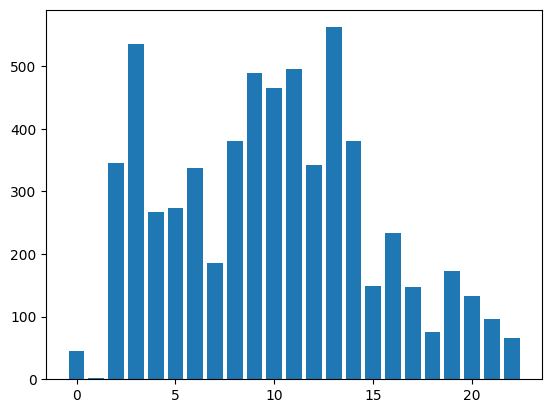

In [29]:
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [30]:
fsAverage = fs.scores_.sum() / 23
fsAverage

268.78186222690584

# **Data Cleaning**
---

In [31]:
ds.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [32]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [33]:
dropcol = ["index", "Patient Id", "Age", "Gender", 
           "Swallowing Difficulty", "Dry Cough", "Snoring"]
ds = ds.drop(dropcol, axis = 1)

In [34]:
ds.isnull().sum()

Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Clubbing of Finger Nails    0
Frequent Cold               0
Level                       0
dtype: int64

In [35]:
ds.head(20)

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Clubbing of Finger Nails,Frequent Cold,Level
0,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,1,2,Low
1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,2,1,Medium
2,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,4,6,High
3,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,5,6,High
4,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,2,4,High
5,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,4,6,High
6,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,1,2,Low
7,3,1,4,3,2,3,4,3,1,4,3,1,3,2,2,4,2,3,Low
8,4,5,6,5,6,5,5,5,6,6,6,5,1,4,3,2,6,2,Medium
9,2,3,4,2,4,3,3,3,2,3,4,4,1,2,4,6,4,2,Medium


In [36]:
ds.describe()

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Clubbing of Finger Nails,Frequent Cold
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000,4.195000,4.438000,4.859000,3.856000,3.855000,4.240000,3.777000,3.923000,3.536000
std,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902,2.311778,2.280209,2.427965,2.244616,2.206546,2.285087,2.041921,2.388048,1.832502
min,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000
75%,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000
max,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,9.000000,9.000000,9.000000,8.000000,9.000000,8.000000,9.000000,7.000000


# **Data Mining**
---

In [37]:
dsvalues = ds.values

x = dsvalues[:, :-1]
y = dsvalues[:, -1]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)

In [39]:
bnb = GaussianNB()

bnb.fit(x_train, y_train)
y_predict = bnb.predict(x_test)
print(classification_report(y_test, y_predict))

kfold_validation = KFold(10)

print(cross_val_score(bnb, x, y, cv=kfold_validation))
result = cross_val_score(bnb, x, y, cv=kfold_validation).mean()
print("Akurasi = %.2f" % (result * 100) + "%")

              precision    recall  f1-score   support

        High       0.86      0.99      0.92       115
         Low       0.85      0.92      0.88        89
      Medium       0.93      0.69      0.79        96

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300

[0.85 0.82 0.83 0.88 0.85 0.83 0.85 0.87 0.86 0.85]
Akurasi = 84.90%


In [40]:
y_predict

array(['Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'High',
       'Low', 'Low', 'Medium', 'Low', 'High', 'Medium', 'High', 'High',
       'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'High', 'High',
       'High', 'High', 'Low', 'Low', 'High', 'Low', 'Medium', 'Low',
       'Medium', 'Low', 'Medium', 'Low', 'High', 'Low', 'High', 'Medium',
       'Medium', 'Medium', 'High', 'High', 'High', 'Low', 'Low', 'High',
       'Low', 'Low', 'Medium', 'Medium', 'High', 'High', 'High', 'High',
       'Low', 'Medium', 'Low', 'Medium', 'Low', 'High', 'Low', 'High',
       'High', 'Medium', 'Medium', 'High', 'Low', 'High', 'Medium',
       'Medium', 'Low', 'Medium', 'Low', 'Low', 'High', 'Medium', 'Low',
       'Medium', 'High', 'High', 'Low', 'High', 'Medium', 'Medium',
       'High', 'Medium', 'High', 'Medium', 'Medium', 'High', 'Medium',
       'High', 'High', 'Medium', 'Low', 'Low', 'Low', 'High', 'High',
       'Low', 'High', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'High',